In [104]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from torch.utils.data import Dataset, DataLoader
import seaborn as sns
import matplotlib.pyplot as plt


In [105]:
# 데이터셋 로드 (UCI HAR 데이터셋 사용)
def load_uci_har_data():
    X_train = pd.read_csv("E:/dataset/HAR/UCI-HAR/train/X_train.txt", delim_whitespace=True, header=None).values
    y_train = pd.read_csv("E:/dataset/HAR/UCI-HAR/train/y_train.txt", delim_whitespace=True, header=None).values.flatten() - 1
    X_test = pd.read_csv("E:/dataset/HAR/UCI-HAR/test/X_test.txt", delim_whitespace=True, header=None).values
    y_test = pd.read_csv("E:/dataset/HAR/UCI-HAR/test/y_test.txt", delim_whitespace=True, header=None).values.flatten() - 1
    return X_train, y_train, X_test, y_test

class HAR_Dataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [119]:
class PINN(nn.Module):
    def __init__(self, input_dim=561, hidden_dim=256, output_dim=6):
        super(PINN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.fc4 = nn.Linear(hidden_dim // 2, output_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x


In [120]:

#  손실 함수 정의
def pinn_loss(pred, true):
    ce_loss = nn.CrossEntropyLoss()(pred, true)
    prob = torch.softmax(pred, dim=1)
    entropy_loss = -torch.mean(torch.sum(prob * torch.log(prob + 1e-9), dim=1))  # 엔트로피 손실
    confidence_penalty = torch.mean(1.0 - torch.max(prob, dim=1)[0])  # 과도한 확신 방지 (수정됨)
    return ce_loss + 0.1 * entropy_loss + 0.1 * confidence_penalty  # 조합된 손실 (음수 방지)


In [121]:
# 데이터 로드
X_train, y_train, X_test, y_test = load_uci_har_data()
train_dataset = HAR_Dataset(X_train, y_train)
test_dataset = HAR_Dataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 모델 학습
num_epochs = 50
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = PINN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        pred = model(X_batch)
        loss = pinn_loss(pred, y_batch)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader):.4f}")

print("Training complete.")


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_8680\2164478117.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv("E:/dataset/HAR/UCI-HAR/train/X_train.txt", delim_whitespace=True, header=None).values
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_8680\2164478117.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv("E:/dataset/HAR/UCI-HAR/train/y_train.txt", delim_whitespace=True, header=None).values.flatten() - 1
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_8680\2164478117.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv("E:/dataset/HAR/UCI-HAR/test/X_test.txt", delim_whitespace=True, header=None).val

Epoch 1/50, Loss: 0.6256
Epoch 2/50, Loss: 0.2042
Epoch 3/50, Loss: 0.1466
Epoch 4/50, Loss: 0.1196
Epoch 5/50, Loss: 0.0917
Epoch 6/50, Loss: 0.0867
Epoch 7/50, Loss: 0.0984
Epoch 8/50, Loss: 0.0802
Epoch 9/50, Loss: 0.0702
Epoch 10/50, Loss: 0.0746
Epoch 11/50, Loss: 0.0819
Epoch 12/50, Loss: 0.0755
Epoch 13/50, Loss: 0.0681
Epoch 14/50, Loss: 0.0682
Epoch 15/50, Loss: 0.0862
Epoch 16/50, Loss: 0.0619
Epoch 17/50, Loss: 0.0656
Epoch 18/50, Loss: 0.0546
Epoch 19/50, Loss: 0.0542
Epoch 20/50, Loss: 0.0676
Epoch 21/50, Loss: 0.0630
Epoch 22/50, Loss: 0.0615
Epoch 23/50, Loss: 0.0451
Epoch 24/50, Loss: 0.0458
Epoch 25/50, Loss: 0.0533
Epoch 26/50, Loss: 0.0680
Epoch 27/50, Loss: 0.0542
Epoch 28/50, Loss: 0.0444
Epoch 29/50, Loss: 0.0598
Epoch 30/50, Loss: 0.0485
Epoch 31/50, Loss: 0.0507
Epoch 32/50, Loss: 0.0383
Epoch 33/50, Loss: 0.0470
Epoch 34/50, Loss: 0.0485
Epoch 35/50, Loss: 0.0365
Epoch 36/50, Loss: 0.0339
Epoch 37/50, Loss: 0.0566
Epoch 38/50, Loss: 0.0402
Epoch 39/50, Loss: 0.

Test Accuracy: 0.9610
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       496
           1       0.96      0.97      0.96       471
           2       0.99      0.96      0.97       420
           3       0.95      0.89      0.92       491
           4       0.91      0.95      0.93       532
           5       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



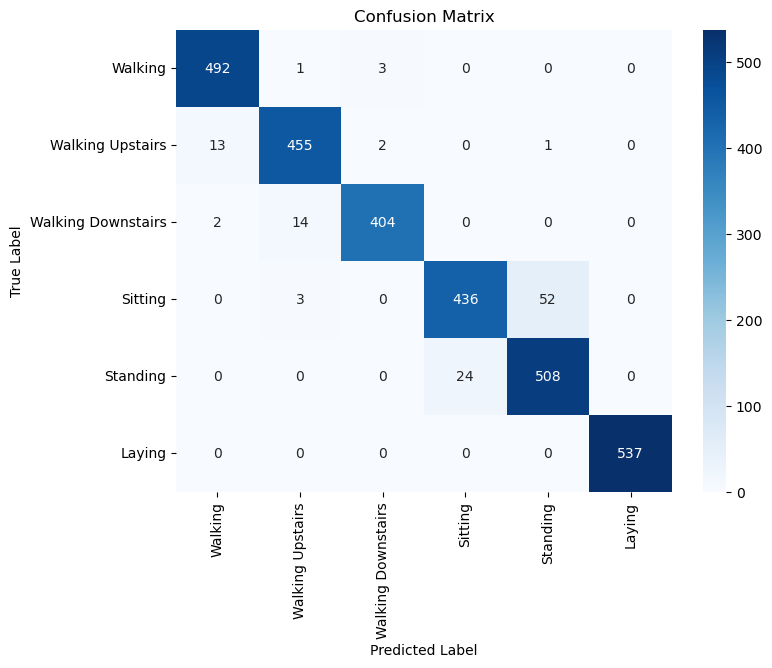

In [122]:
# 모델 평가
model.eval()
y_pred, y_true = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        predictions = torch.argmax(outputs, dim=1).cpu().numpy()
        y_pred.extend(predictions)
        y_true.extend(y_batch.numpy())

# 성능 평가 출력
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_true, y_pred))

# 혼동 행렬 시각화
action_labels = ["Walking", "Walking Upstairs", "Walking Downstairs", "Sitting", "Standing", "Laying"]
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=action_labels, yticklabels=action_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
